In [7]:
from bids import get_composite_table, get_collapsed_bid_table, get_processed_bids, get_census
from utils import  run_ols
import matplotlib.pyplot as plt

In [8]:
processed_bids = get_processed_bids(*[None]*5)
collapsed_bids = get_collapsed_bid_table(None)
composite_table = get_composite_table(None)

neighbor status all bids
0    207299
1     10337
2     24898
3    181597
Name: neighbor_status, dtype: int64
neighbor status winning bids
0    26034
1     2782
2     8939
3    19399
Name: neighbor_status, dtype: int64
cbg competition bidders
0         2
1       149
2      2203
3     34991
4     17056
5      5474
6      1440
7       350
8        66
9         8
10        2
Name: competition bidders, dtype: int64
finishing round
12.0     1893
13.0    32628
14.0     4481
15.0     3686
16.0     2376
17.0     5380
18.0     2252
19.0     4458
Name: round, dtype: int64
cbg won
True     57154
False     4587
Name: winner, dtype: int64


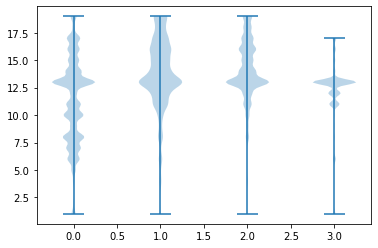

In [9]:
print("neighbor status all bids")
print(processed_bids["neighbor_status"].value_counts().sort_index())
print("neighbor status winning bids")
print(processed_bids[processed_bids["winner"]]["neighbor_status"].value_counts().sort_index())
print("cbg competition bidders")
print(collapsed_bids["competition bidders"].value_counts().sort_index())
print("finishing round")
print(collapsed_bids["round"].value_counts().sort_index())
print("cbg won")
print((~collapsed_bids["winner"].isna()).value_counts())

plt.violinplot([processed_bids[processed_bids.neighbor_status == 0]["round"].values,
                processed_bids[processed_bids.neighbor_status == 1]["round"].values,
                processed_bids[processed_bids.neighbor_status == 2]["round"].values,
                processed_bids[processed_bids.neighbor_status == 3]["round"].values],
               range(0, 4))
plt.show()

In [10]:
formula = "round ~ B01001e1 + B01002e1 + second_neighbor_dummy + second_existing_dummy + second_sat_dummy + neighbor_dummy+ existing_dummy+ sat_dummy + (neighbor_dummy+ existing_dummy+ sat_dummy) * (second_neighbor_dummy + second_existing_dummy + second_sat_dummy)"
result = run_ols(formula, composite_table[composite_table["round"] > 13])

                            OLS Regression Results                            
Dep. Variable:                  round   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     807.8
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:46:08   Log-Likelihood:            -1.7527e+05
No. Observations:               99409   AIC:                         3.506e+05
Df Residuals:                   99391   BIC:                         3.508e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
